## Saras labb 1.1 

Import the text files

In [165]:
import numpy as np
import matplotlib.pyplot as plt

pikachu = "pikachu.txt" 
with open("pikachu.txt", "r") as file:
    pikachu = file.read()

pichu = "pichu.txt" 
with open("pichu.txt", "r") as file:
        pichu = file.read()


In [166]:
pikachu.split("\n")[1:-1]
pichu.split("\n")[1:-1]

['(20.11541438766307, 28.701809671168824)',
 '(15.200086041781336, 27.095070307714877)',
 '(17.200234546952956, 27.669778220491132)',
 '(16.785685905190583, 34.36654587712494)',
 '(20.8917697133121, 31.480353852465935)',
 '(20.41359589938329, 31.091310056669883)',
 '(22.137436541638763, 26.71138648198097)',
 '(15.695510661035328, 32.291267979503495)',
 '(18.375374557482164, 26.634024937619284)',
 '(15.238377755504562, 28.794554417576478)',
 '(16.749103798428827, 34.895233506365955)',
 '(19.042842304826898, 31.399997598540928)',
 '(15.212287757470909, 30.569497437746463)',
 '(16.59070120549319, 31.846142509898748)',
 '(20.199075502236184, 33.4285192018981)',
 '(19.35953184482573, 32.75999911546245)',
 '(16.763524976325574, 27.290480719641042)',
 '(19.71412547100727, 25.321002439040377)',
 '(21.475443653422612, 28.154530480590818)',
 '(15.051990077424488, 27.67740875975703)',
 '(21.446554014662464, 27.109828435863264)',
 '(20.585115159905815, 34.429097143350546)',
 '(17.722004132143937, 

In [168]:
pikachu = (eval(num_str) for num_str in pikachu)
pichu = (eval(num_str) for num_str in pichu)

In [178]:
pikachu = pikachu_tupel= ("(width (cm), height (cm)")
pichu = pichu_tupel = ("(width (cm), height (cm)")
#pichu = np.array(pichu)
                    
colors = ['#33FF57', '#3357FF', '#57FF33', '#5733FF']

for i, color in (colors):
    plt.scatter(pikachu, pichu, c=colors, s=150, marker='*')

plt.show()

ValueError: too many values to unpack (expected 2)

Store it in an array

ValueError: s must be a scalar, or float array-like with the same size as x and y

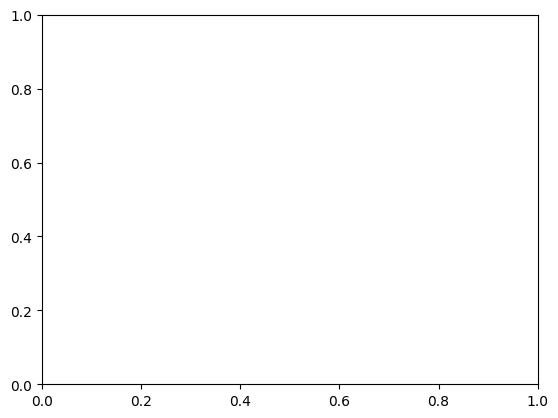

Debugging of the text files

<built-in function array> <built-in function array>


Decision tree classifier

In [ ]:
def decision_tree_classify(sample):
    if sample[0] < 20:
        return 'Pichu'
    else:
        return 'Pikachu'

In [ ]:
test_data = [(25,35),(15,14), (26,30), (22,45)]
for sample in test_data:
    classification = decision_tree_classify(np.array(sample))
    print(f"Sample with (width, hight): {sample} classified as {classification}")

Sample with (width, hight): (25, 35) classified as Pikachu
Sample with (width, hight): (15, 14) classified as Pichu
Sample with (width, hight): (26, 30) classified as Pikachu
Sample with (width, hight): (22, 45) classified as Pikachu
